In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('car data.csv')

In [5]:
df = pd.DataFrame(data)

# Exploratory Data Analysis

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df['Fuel_Type'].unique

<bound method Series.unique of 0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: Fuel_Type, Length: 301, dtype: object>

In [31]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,
                                       'Diesel':1,
                                       'CNG':2})
data['Selling_type'] = data['Selling_type'].map({'Dealer':0,
                                             'Individual':1})
data['Transmission'] = data['Transmission'].map({'Manual':0,
                                             'Automatic':1})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 23.4+ KB


In [28]:
x = df[df['Driven_kms'] >= 200000].index
data =df.drop(x)
df[df['Driven_kms'] >= 200000]
data[data['Driven_kms'] >= 200000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [33]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Data Visualization

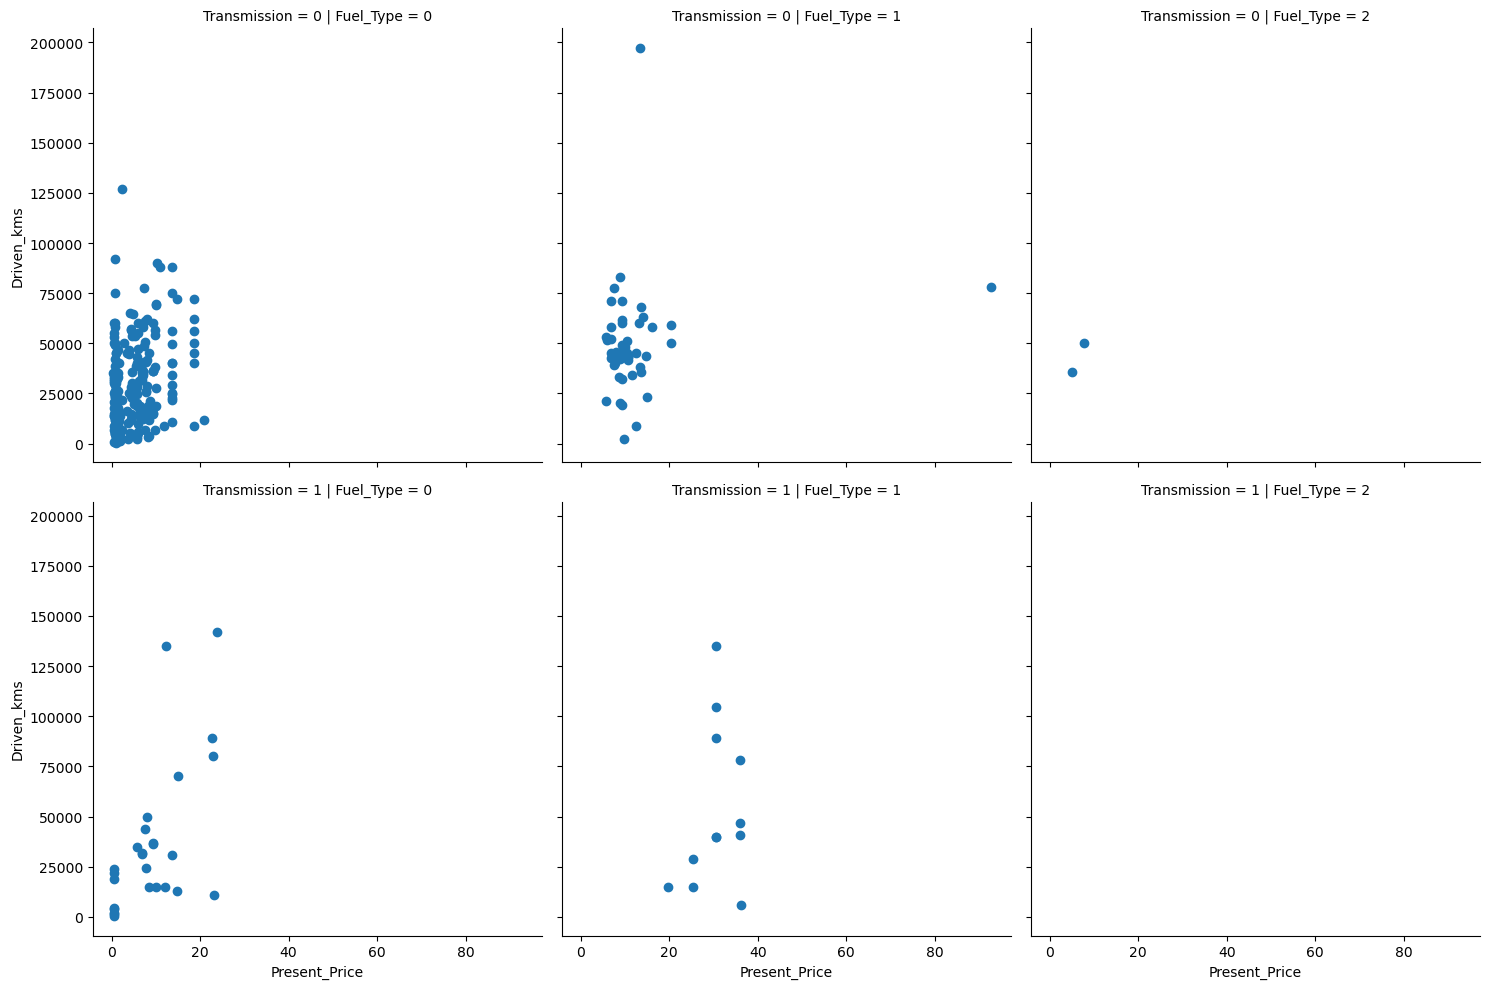

In [34]:
s = sns.FacetGrid(data=data,col='Fuel_Type',row='Transmission',height=5)
s.map(plt.scatter,'Present_Price','Driven_kms')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>,
        <Axes: title={'center': 'Present_Price'}>],
       [<Axes: title={'center': 'Driven_kms'}>,
        <Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Selling_type'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

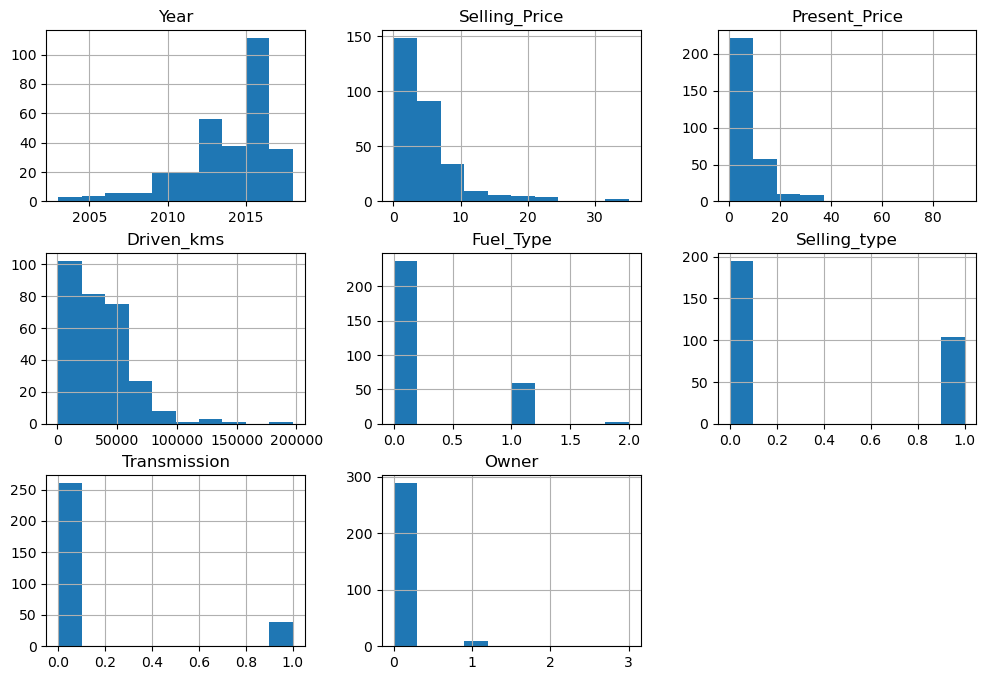

In [35]:
data.hist(figsize=(12,8))


# Modeling

In [36]:
y = data['Selling_Price']
x = data.drop(['Selling_Price','Car_Name'],axis=1)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Using Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression, Ridge

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = reg.predict(x_test)

# Performance Measurement

In [42]:
from sklearn.metrics import r2_score
print('R2_score of this model is:',r2_score(y_test,reg.predict(x_test))*100)

R2_score of this model is: 90.1884239322096


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear:f}')

Linear Regression RMSE: 1.831700


# Using Ridge regression

In [48]:
reg2 = Ridge(alpha=0.5)
reg2.fit(x_train, y_train)
y_pred2 = reg2.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
print('R2_score of this model is:',r2_score(y_test,y_pred2)*100)

R2_score of this model is: 90.18692584622525


In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = sqrt(mse_linear)
print(f'Ridge Regression RMSE: {rmse_linear:f}')

Linear Regression RMSE: 1.831700


# Using Random forest regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg3 = RandomForestRegressor()
reg3.fit(x_train, y_train)
y_pred3 = reg3.predict(x_test)

In [58]:
from sklearn.metrics import r2_score
print('R2_score of this model is:',r2_score(y_test,reg3.predict(x_test))*100)

R2_score of this model is: 97.25263675351798


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred3)
rmse_linear = sqrt(mse_linear)
print(f'Random Forest Regression RMSE: {rmse_linear:3f}')

Linear Regression RMSE: 0.969266


In [47]:
print("{:.1f}".format(230.3215))

230.3


# Using Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
reg4 = DecisionTreeRegressor()
reg4.fit(x_train, y_train)
y_pred4 = reg4.predict(x_test)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.9713138243493495

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred4)
rmse_linear = sqrt(mse_linear)
print(f'Decision Tree Regression RMSE: {rmse_linear:3f}')

Decision Tree Regression RMSE: 0.990424


# Output

In [62]:
# Giving 7 predefined inputs
value = reg5.predict([[2011,4.15,5200,0,0,0,0]])
value

array([2.85])